In [900]:
#import libraries/modules/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')


In [902]:
# Load the data
df = pd.read_csv("C:/Users/bejag/Dropbox/PC/Desktop/Data Analysis/HR-Employee-Attrition.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [904]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [906]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [908]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [910]:
df.duplicated().sum()

0

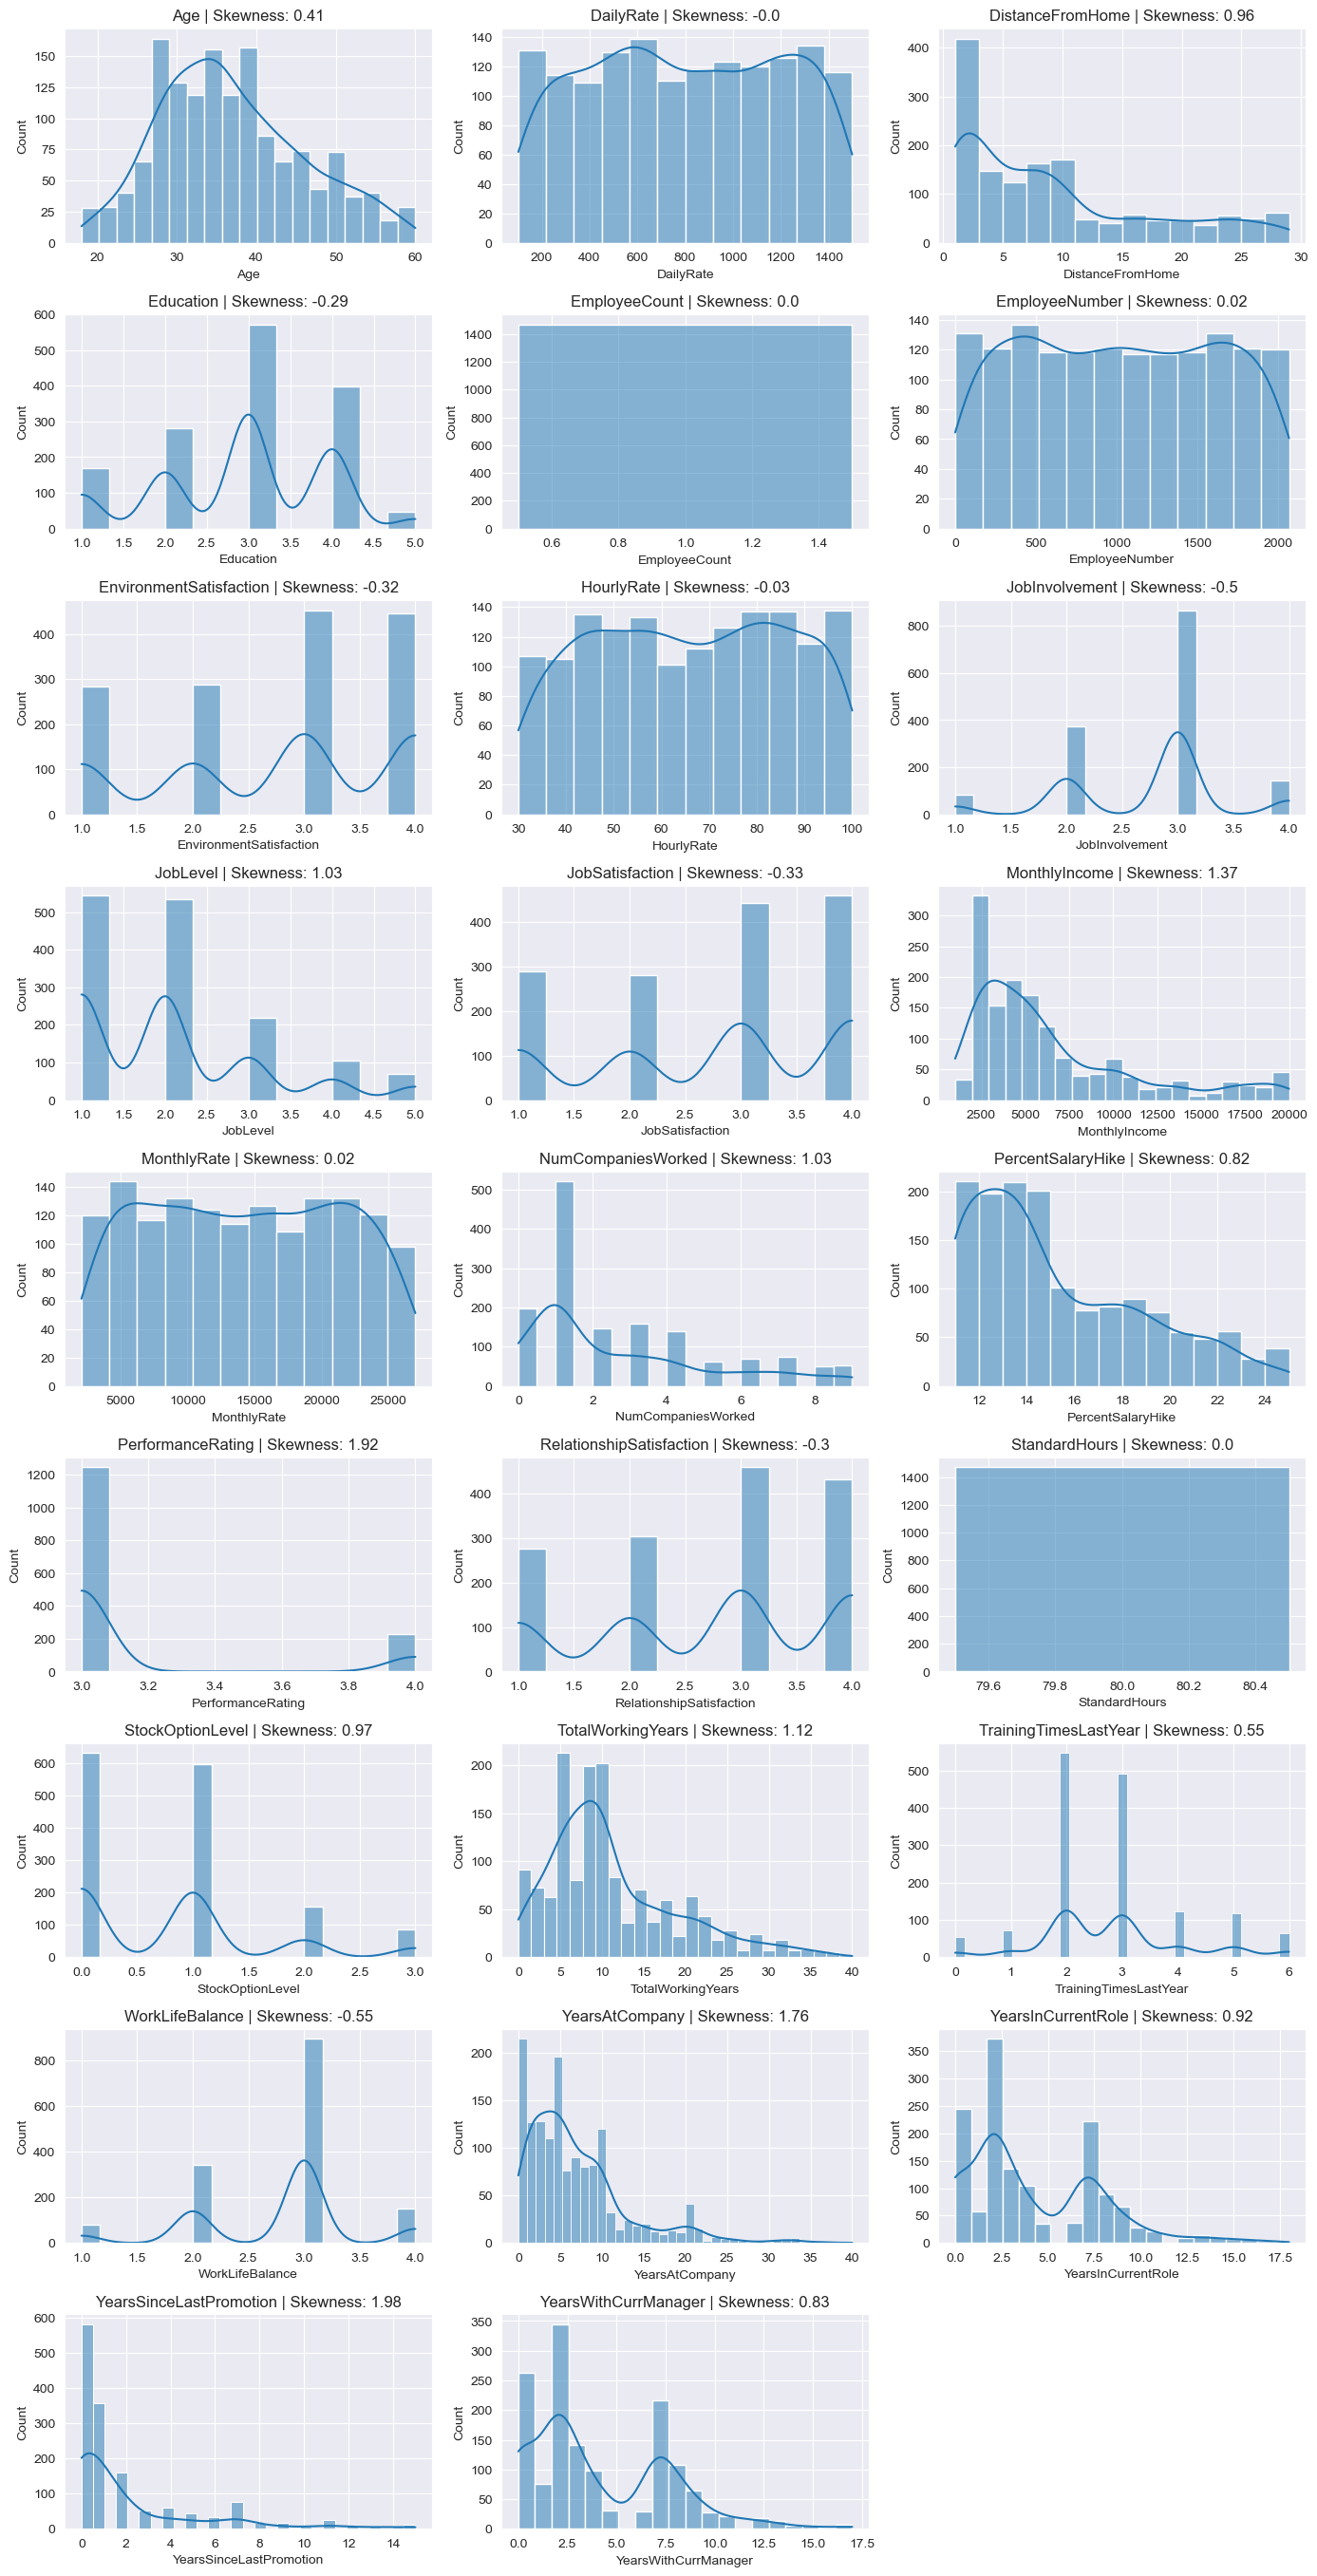

In [912]:
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

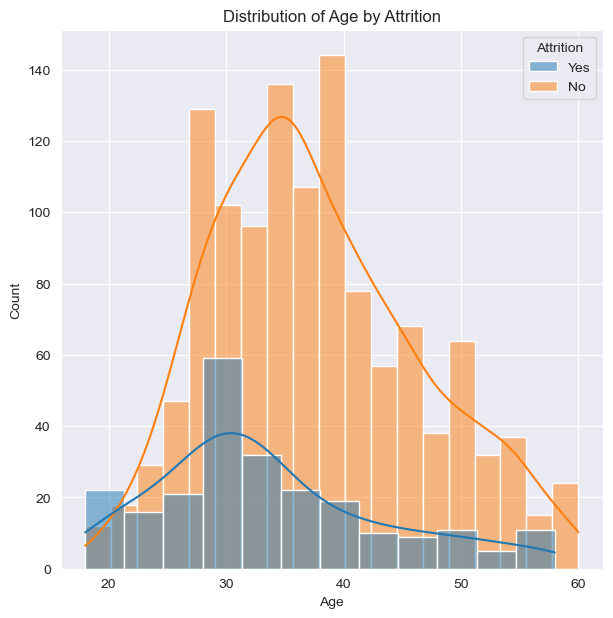

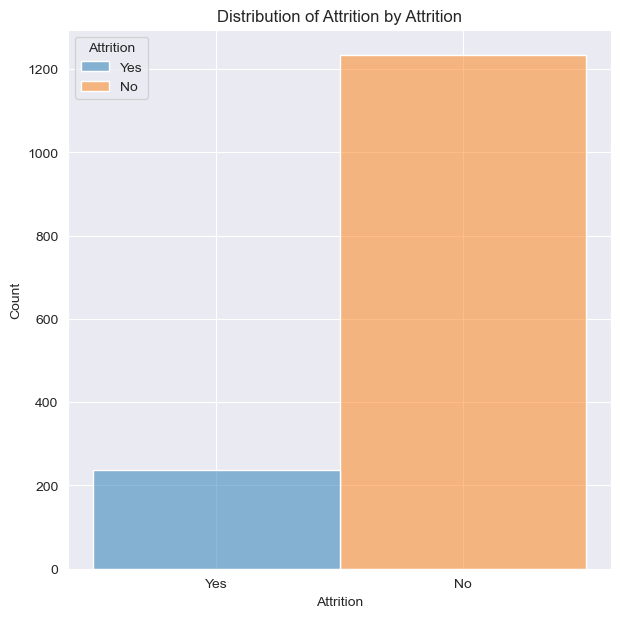

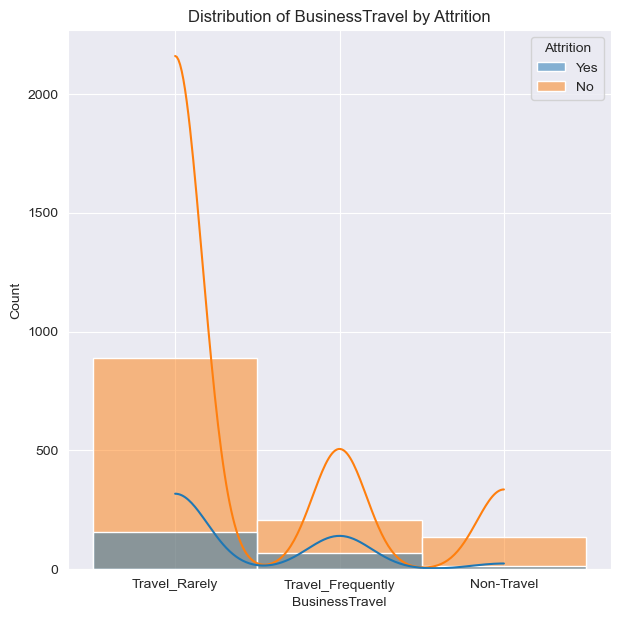

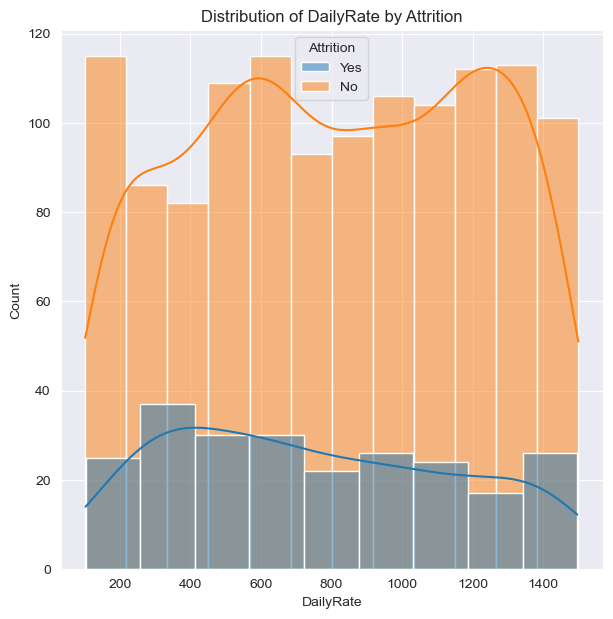

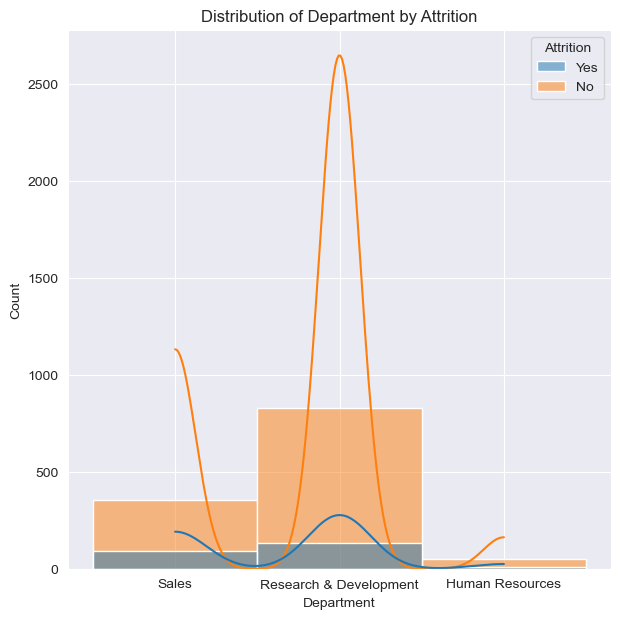

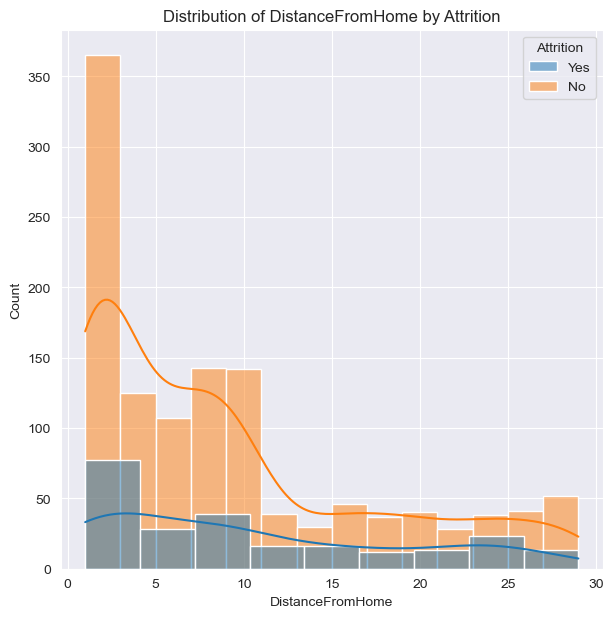

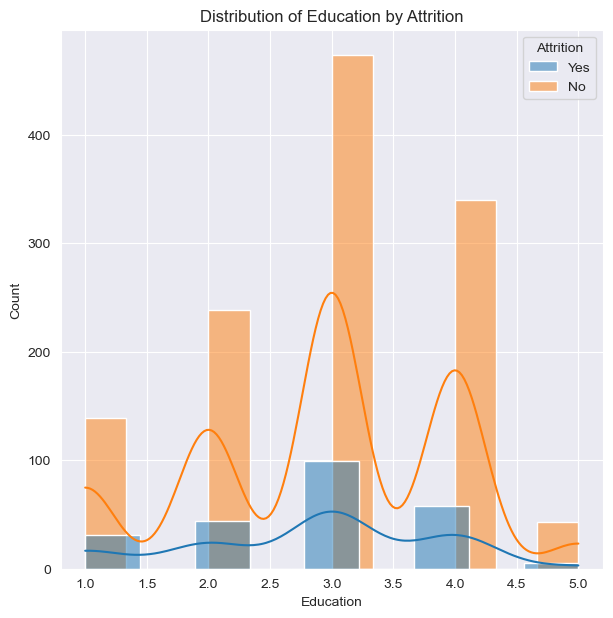

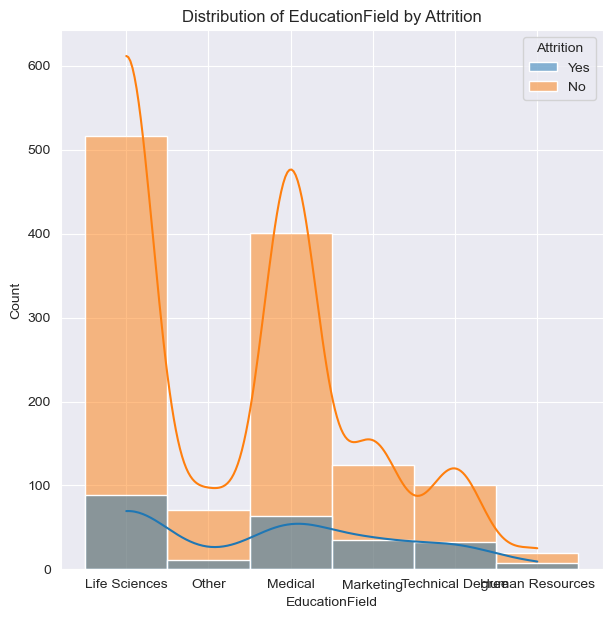

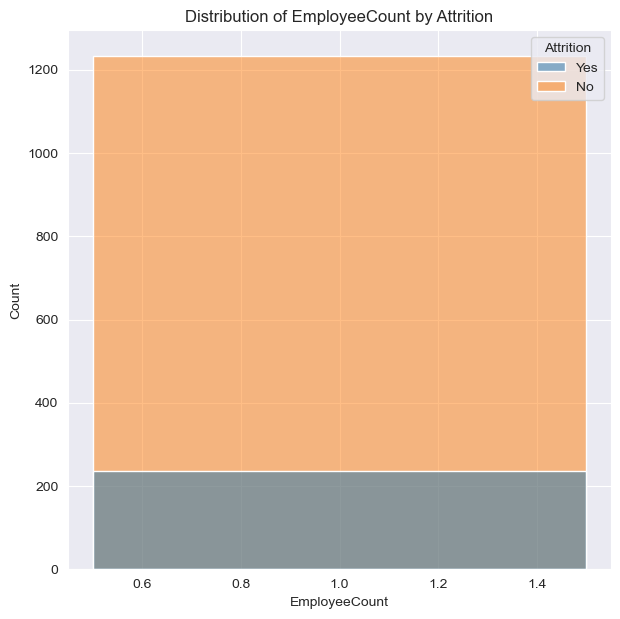

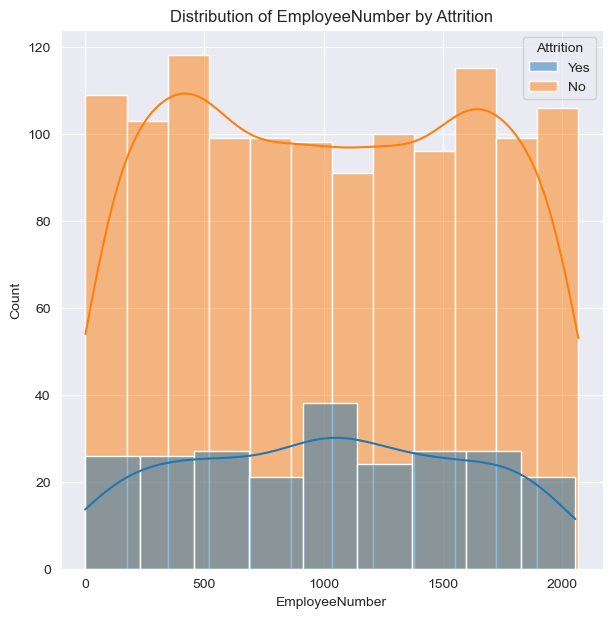

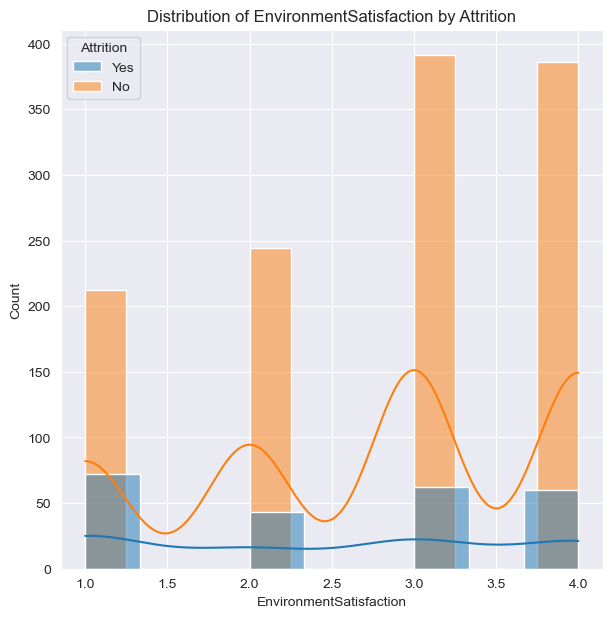

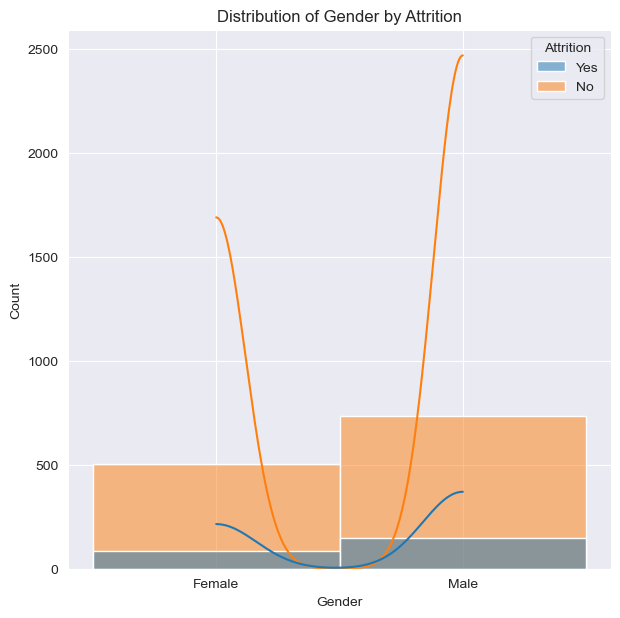

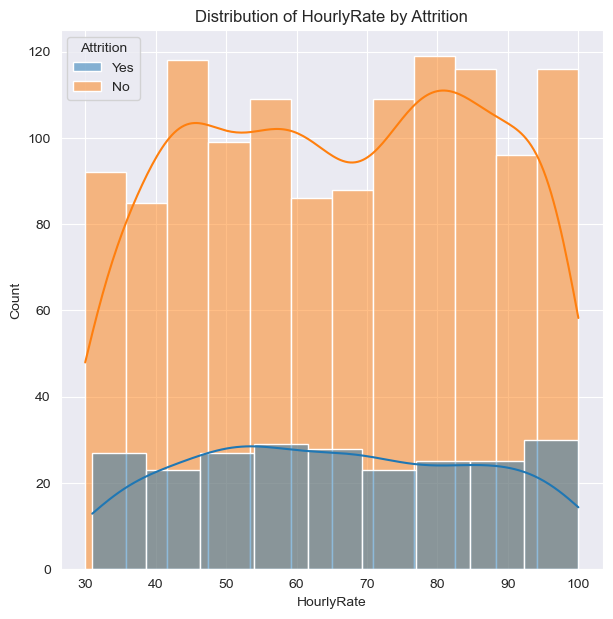

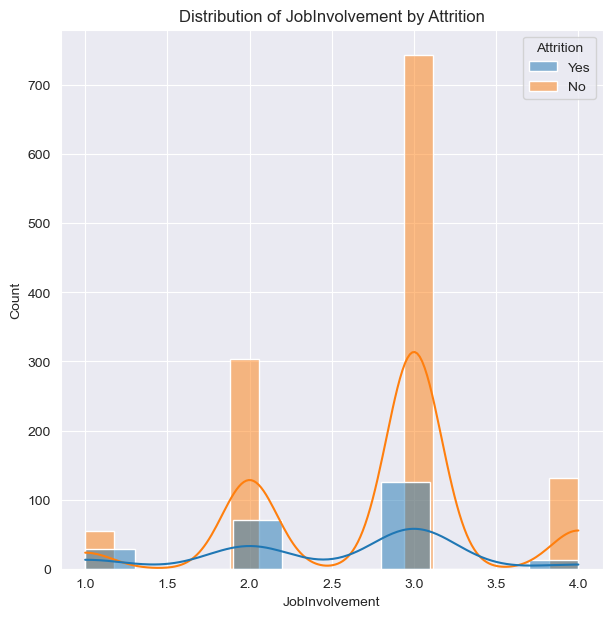

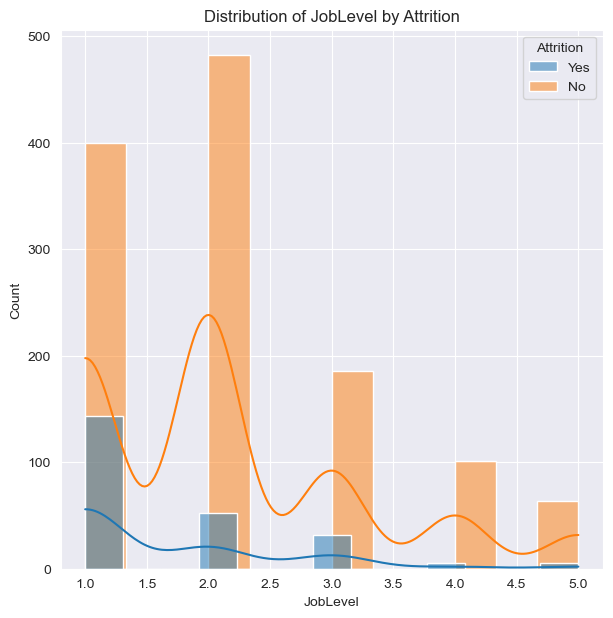

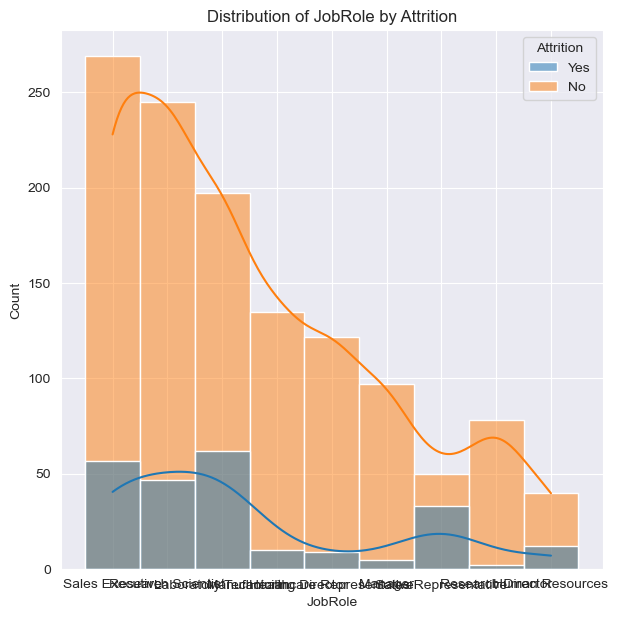

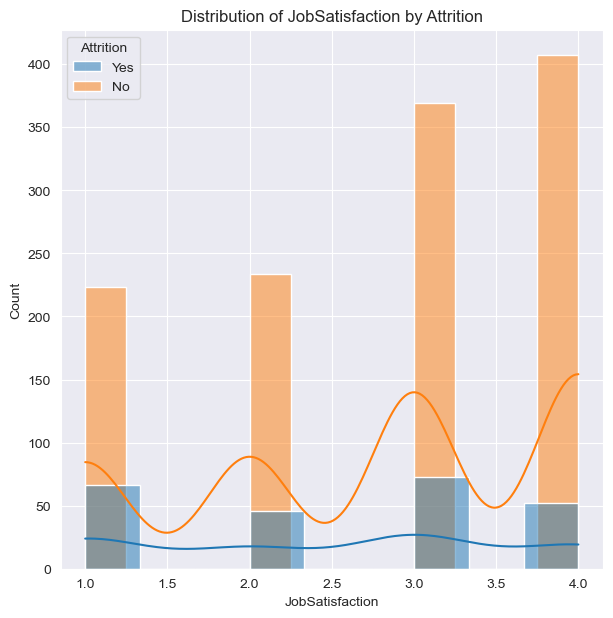

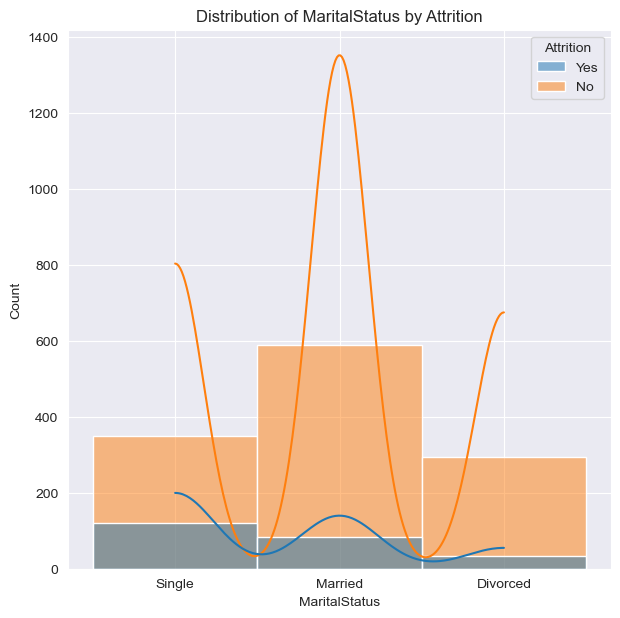

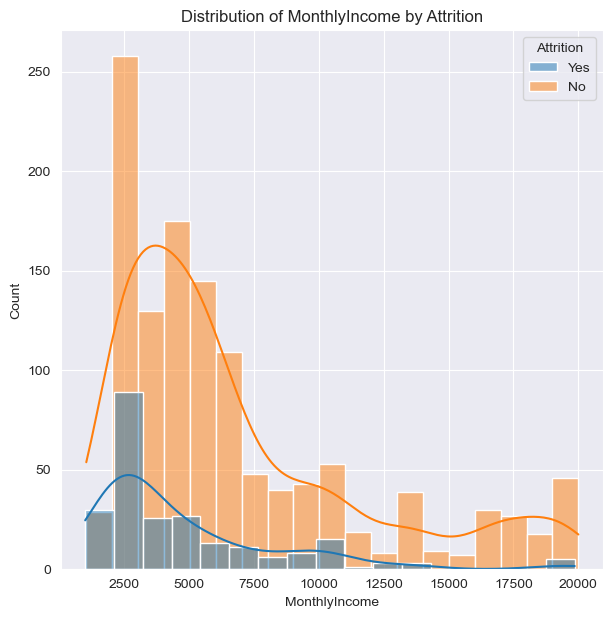

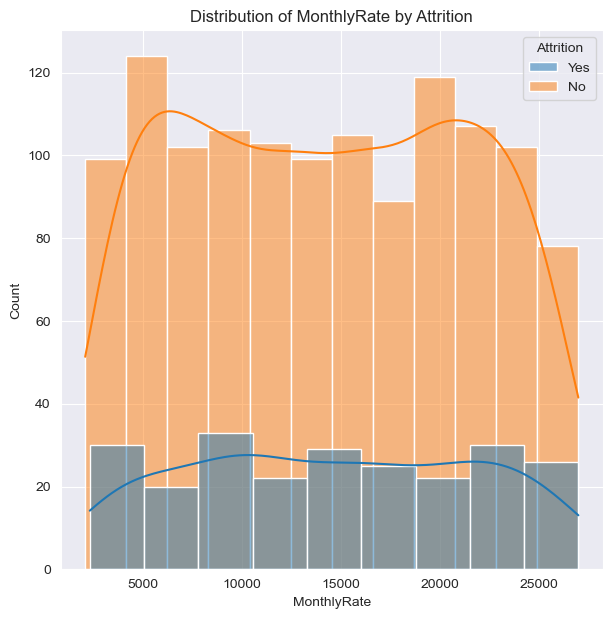

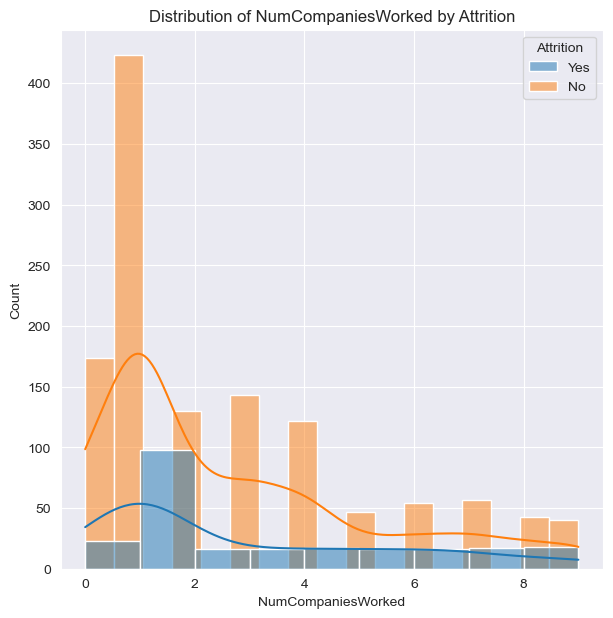

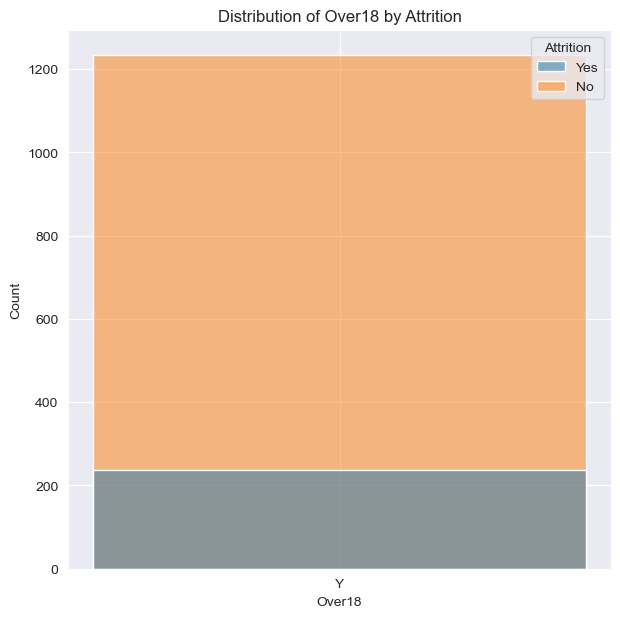

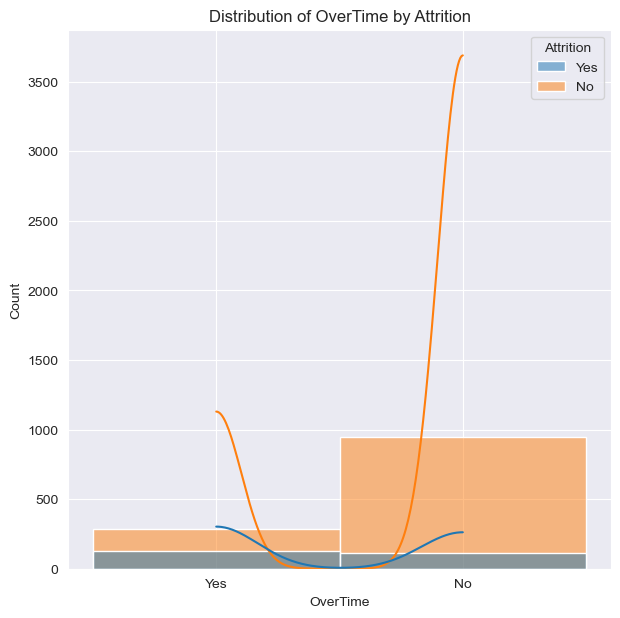

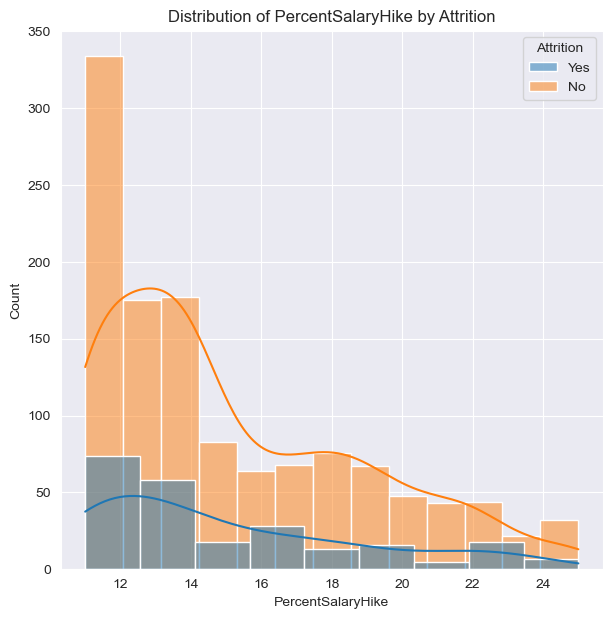

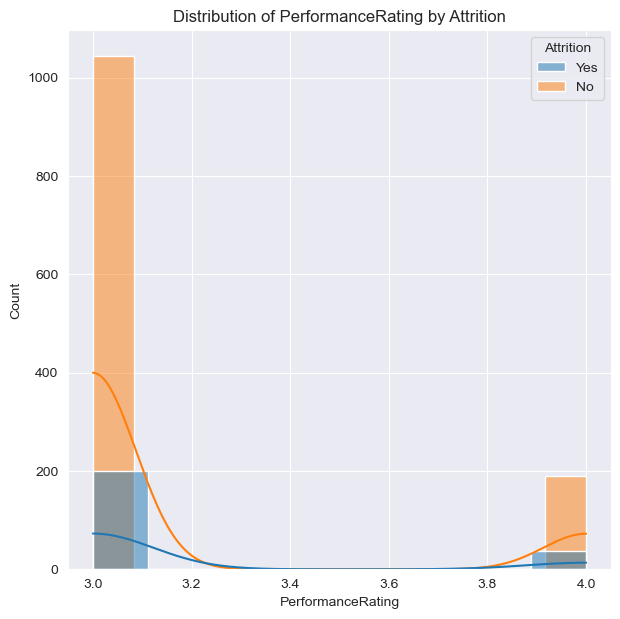

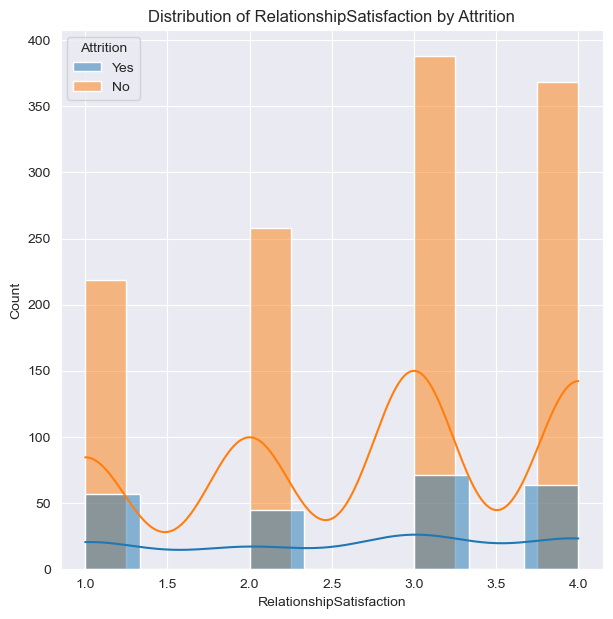

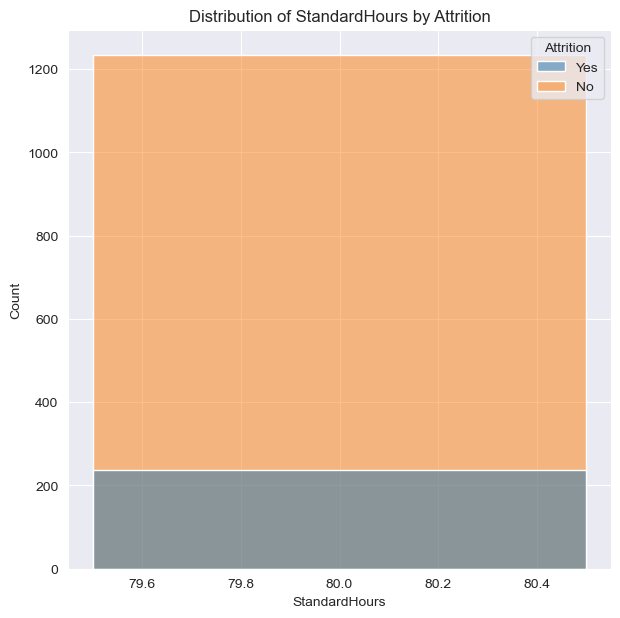

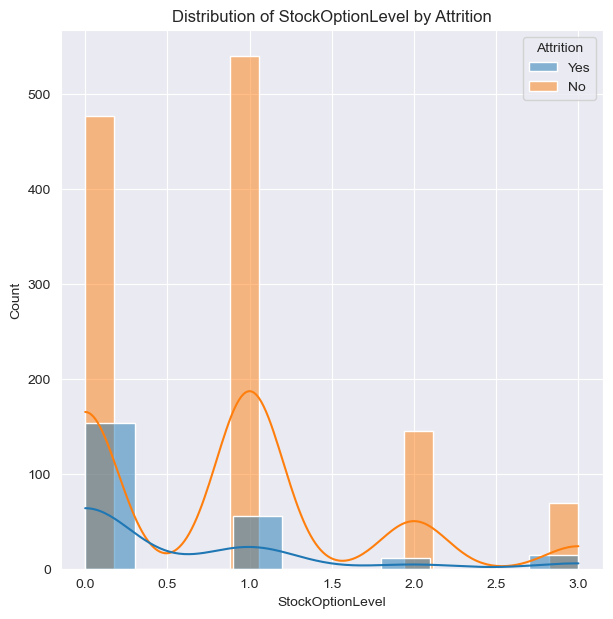

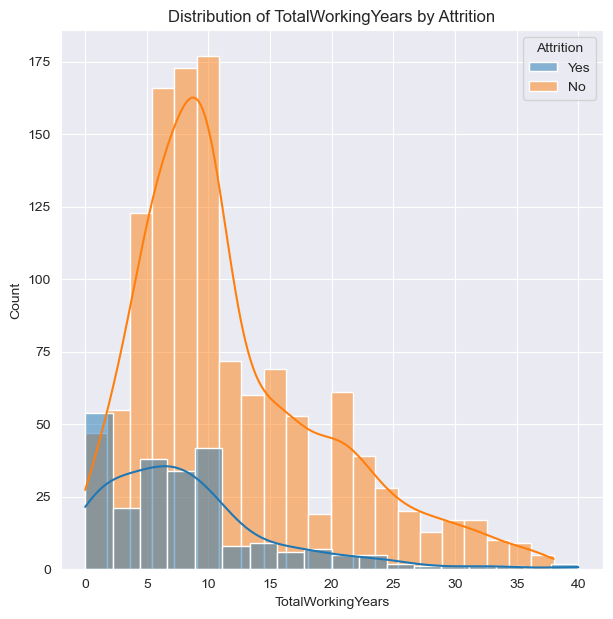

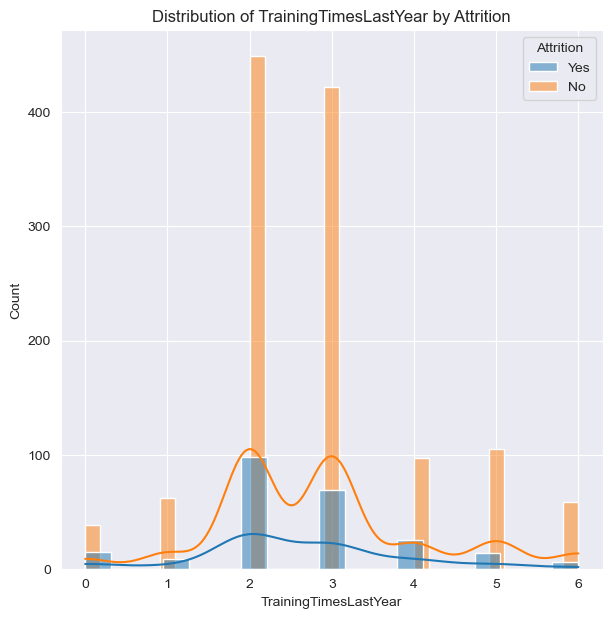

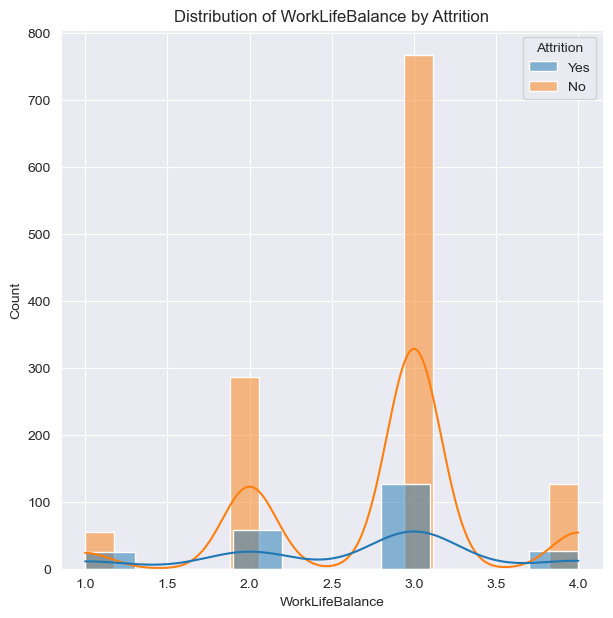

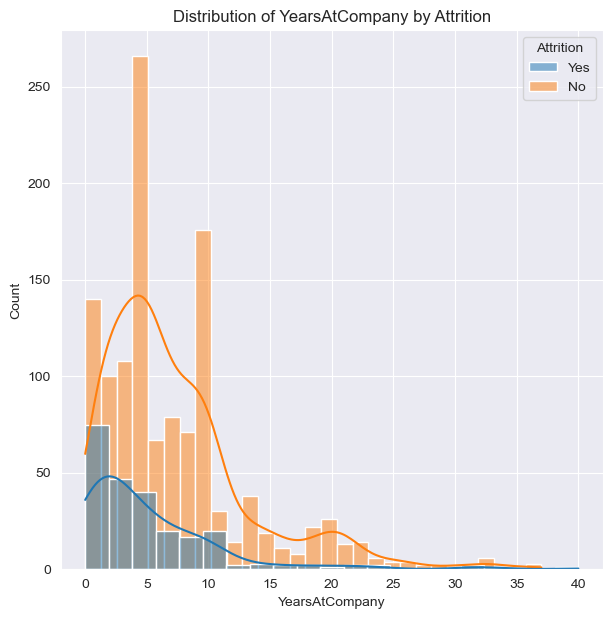

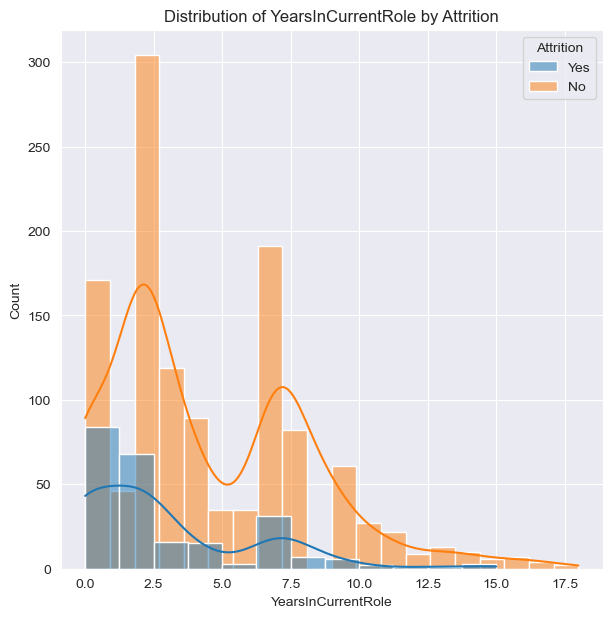

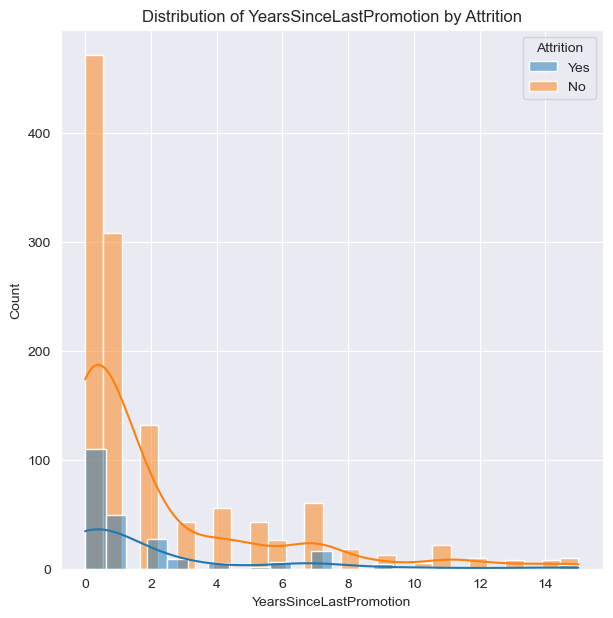

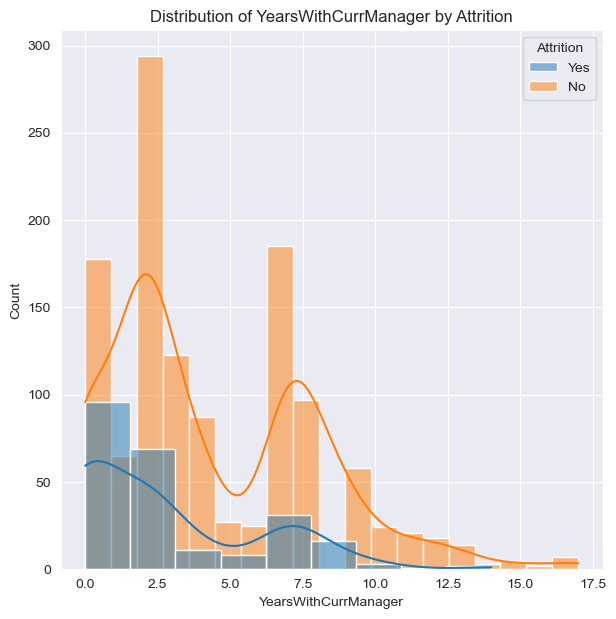

In [913]:
# Plot all columns with histograms
columns_to_plot = df.columns
for col in columns_to_plot:
    plt.figure(figsize=(7,7))
    sns.histplot(df, x=col, hue='Attrition', fill=True, kde=True, common_bins=False)
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()


In [914]:
# drop constant columns
dropCols = ['EmployeeCount','Over18','StandardHours']
df = df.drop(columns=dropCols)

In [915]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [916]:
#find categorical cols and cols with 2 unique values
cols_to_bnry = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() <= 2:
        cols_to_bnry.append(col)
        #print col name and its unique categorical values
        print(col, ": ", df[col].unique())
        
#create and head df of categorical cols
bnry_df = df[cols_to_bnry]
display(bnry_df.head(5))

Attrition :  ['Yes' 'No']
BusinessTravel :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department :  ['Sales' 'Research & Development' 'Human Resources']
EducationField :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender :  ['Female' 'Male']
JobRole :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus :  ['Single' 'Married' 'Divorced']
OverTime :  ['Yes' 'No']
PerformanceRating :  [3 4]


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,PerformanceRating
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,3
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,4
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,3
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,3


In [917]:
#binarize categorical cols using dummy variables
bnry_df = pd.get_dummies(bnry_df, drop_first=True)
display(bnry_df.head(5))

,PerformanceRating,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,3,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
1,4,False,True,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,3,True,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,True
3,3,False,True,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,3,False,False,True,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False


In [918]:
# remap true and false values to 1 and 0 respectively
for col in bnry_df:
    bnry_df[col] = bnry_df[col].astype(int)
    bnry_df.loc[bnry_df[col] == True, col] = 1
    bnry_df.loc[bnry_df[col] == False, col] = 0


In [919]:
# remap 4 and 3 in Performance Rating to 1 and 0 respectively
bnry_df.loc[bnry_df['PerformanceRating'] == 4, 'PerformanceRating'] = 1
bnry_df.loc[bnry_df['PerformanceRating'] == 3, 'PerformanceRating'] = 0

In [920]:
display(bnry_df.head(5))

,PerformanceRating,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [921]:
## renaming columns
# PerformanceRating only had 3s and 4s
bnry_df = bnry_df.rename(columns={'PerformanceRating': 'PerformanceRating4', 'Attrition_Yes': 'Attrition', 'BusinessTravel_Travel_Frequently': 'Travel_Frequently', 
                                  'BusinessTravel_Travel_Rarely': 'Travel_Rarely', 'Department_Research & Development': 'Department_R&D', 'MaritalStatus_Married': 'Married', 
                                  'OverTime_Yes': 'OverTime'})

display(bnry_df.head(5))


,PerformanceRating4,Attrition,Travel_Frequently,Travel_Rarely,Department_R&D,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Married,MaritalStatus_Single,OverTime
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [922]:
# drop cols that were binarized from original df
df = df.drop(columns=cols_to_bnry)

#merge df and bnry df
df = df.merge(bnry_df, how='outer', left_index=True, right_index=True)

#head merged df
display(df.head(5))


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Married,MaritalStatus_Single,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [923]:
#drop unnecessary cols
dropCols = ['MaritalStatus_Single','JobRole_Sales Representative','JobRole_Sales Executive','JobRole_Research Scientist','JobRole_Manufacturing Director',
            'JobRole_Manager','JobRole_Laboratory Technician','JobRole_Human Resources','EducationField_Other','EducationField_Medical',
            'EducationField_Marketing','EducationField_Life Sciences','Department_Sales','MonthlyIncome','MonthlyRate','EmployeeNumber']
df = df.drop(columns=dropCols)

In [924]:
# dropping cols that were found to be insignificant in first logistic regression model
dropCols = ['EducationField_Technical Degree','PerformanceRating4','JobLevel','HourlyRate','Education']
df = df.drop(columns=dropCols)

In [925]:
# dropping cols that were found to be insignificant in second-fourth logistic regression model
dropCols = ['YearsAtCompany','YearsInCurrentRole','DailyRate','Married','PercentSalaryHike',
            'TrainingTimesLastYear','Gender_Male','JobRole_Research Director','Age']
df = df.drop(columns=dropCols)

In [926]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.19,8.11,1.0,2.0,7.0,14.0,29.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.0,3.0,3.0,4.0
JobSatisfaction,1470.0,2.73,1.10,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.0,2.0,4.0,9.0
RelationshipSatisfaction,1470.0,2.71,1.08,1.0,2.0,3.0,4.0,4.0
StockOptionLevel,1470.0,0.79,0.85,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.28,7.78,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.76,0.71,1.0,2.0,3.0,3.0,4.0
YearsSinceLastPromotion,1470.0,2.19,3.22,0.0,0.0,1.0,3.0,15.0


In [927]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE

In [928]:
# original df
X = df.drop('Attrition', axis =1)
y = df['Attrition'].astype('int')

print("Original X shape: ", X.shape)
print("Original y shape: ", y.shape)

# Smooth data using borderline SMOTE with Nearest Neigbor Analysis
blsmote = BorderlineSMOTE(sampling_strategy='minority', kind='borderline-1')
X_resampled, y_resampled = blsmote.fit_resample(X, y)
print("Resampled X shape: ", X_resampled.shape)
print("Resampled y shape: ", y_resampled.shape)
#y_resampled.value_counts()

Original X shape:  (1470, 15)
Original y shape:  (1470,)
Resampled X shape:  (2466, 15)
Resampled y shape:  (2466,)


In [929]:
# print statistic description of resampled data
X_resampled.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,2466.0,9.81,8.27,1.0,2.0,8.0,15.0,29.0
EnvironmentSatisfaction,2466.0,2.47,1.10,1.0,1.0,3.0,3.0,4.0
JobInvolvement,2466.0,2.52,0.74,1.0,2.0,3.0,3.0,4.0
JobSatisfaction,2466.0,2.49,1.10,1.0,1.0,3.0,3.0,4.0
NumCompaniesWorked,2466.0,2.68,2.43,0.0,1.0,2.0,4.0,9.0
RelationshipSatisfaction,2466.0,2.52,1.05,1.0,2.0,3.0,3.0,4.0
StockOptionLevel,2466.0,0.59,0.79,0.0,0.0,0.0,1.0,3.0
TotalWorkingYears,2466.0,9.75,7.41,0.0,5.0,8.0,13.0,40.0
WorkLifeBalance,2466.0,2.60,0.75,1.0,2.0,3.0,3.0,4.0
YearsSinceLastPromotion,2466.0,1.92,3.12,0.0,0.0,1.0,2.0,15.0


In [930]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1972, 15)
X_test shape: (494, 15)
y_train shape: (1972,)
y_test shape: (494,)


In [931]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [932]:
# Separate features and target
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Scale only the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [933]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=2024)

In [935]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [936]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc

In [937]:
# create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted')

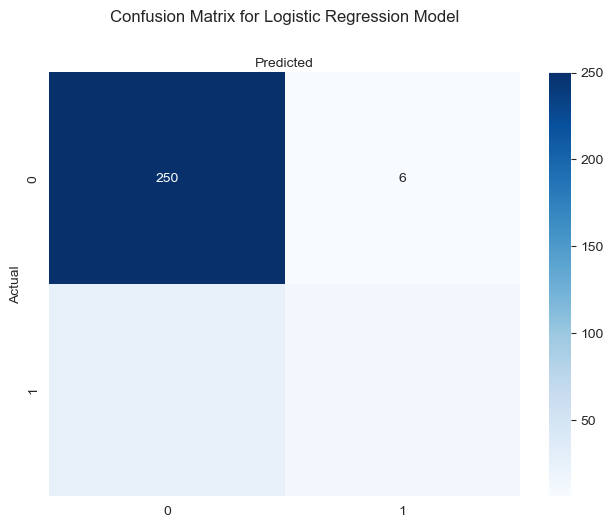

In [938]:
# visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Model', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [939]:
# Display results
results_data = pd.DataFrame(results).T
print(results_data)

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.911565   0.833333  0.394737  0.535714
Decision Tree           0.809524   0.326923  0.447368  0.377778
K-Nearest Neighbors     0.853741   0.368421  0.184211  0.245614
Support Vector Machine  0.894558   0.818182  0.236842  0.367347
Random Forest           0.894558   0.818182  0.236842  0.367347
Gradient Boosting       0.894558   0.684211  0.342105  0.456140


In [940]:
import statsmodels.api as sm

In [941]:

# Define the logistic regression model
lr = LogisticRegression(solver='liblinear')

# Train the model
lr.fit(X_train, y_train)


# Predictions using the logistic regression model
y_pred = lr.predict(X_test)


In [942]:
# creating statsmodels logistic regression model to visualize model details and variable p-values

# Add a constant to the independent variables (for the intercept term)
x_train = sm.add_constant(x_train)

# Fit the logistic regression model
model = sm.Logit(y_train, x_train).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.331626
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                           15
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.2706
Time:                        18:24:55   Log-Likelihood:                -389.99
converged:                       True   LL-Null:                       -534.66
Covariance Type:            nonrobust   LLR p-value:                 9.150e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3041      0.128    -18.037      0.000      -2.554      -2.054
x1             0.2990      0.

In [943]:
# performing predictions on the test dataset 
yhat = model.predict(sm.add_constant(x_test)) 
prediction = list(map(round, yhat))

In [944]:
#comparing this model's accuracy to first to ensure identical performance
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[253   3]
 [ 23  15]]
Test accuracy =  0.9115646258503401


In [945]:
# HVR's current remote values
HVRRemote = pd.DataFrame({'DistanceFromHome': [0], 'EnvironmentSatisfaction': [4], 
                           'JobInvolvement': [2], 'JobSatisfaction': [0], 
                           'NumCompaniesWorked': [5], 'RelationshipSatisfaction': [4], 
                           'StockOptionLevel': [1], 'TotalWorkingYears': [4], 
                           'WorkLifeBalance': [2], 'YearsSinceLastPromotion': [7], 
                           'YearsWithCurrManager': [2], 'Travel_Frequently': [0], 
                           'Travel_Rarely': [0], 'Department_R&D': [1], 'OverTime': [5]})
# HVR's potential on-site values
HVROnSite = pd.DataFrame({'DistanceFromHome': [50], 'EnvironmentSatisfaction': [5], 
                           'JobInvolvement': [3], 'JobSatisfaction': [2], 
                           'NumCompaniesWorked': [5], 'RelationshipSatisfaction': [4], 
                           'StockOptionLevel': [3], 'TotalWorkingYears': [10], 
                           'WorkLifeBalance': [10], 'YearsSinceLastPromotion': [5], 
                           'YearsWithCurrManager': [2], 'Travel_Frequently': [0], 
                           'Travel_Rarely': [0], 'Department_R&D': [1], 'OverTime': [2]})

In [946]:
# HVR's potential hybrid values
HVRHybrid = pd.DataFrame({'DistanceFromHome': [30], 'EnvironmentSatisfaction': [3], 
                           'JobInvolvement': [3], 'JobSatisfaction': [3], 
                           'NumCompaniesWorked': [5], 'RelationshipSatisfaction': [4], 
                           'StockOptionLevel': [3], 'TotalWorkingYears': [22], 
                           'WorkLifeBalance': [2], 'YearsSinceLastPromotion': [3], 
                           'YearsWithCurrManager': [3], 'Travel_Frequently': [0], 
                           'Travel_Rarely': [0], 'Department_R&D': [1], 'OverTime': [0]})

In [947]:
#remote prediction
HVRRemotePred = lr.predict_proba(HVRRemote)[:,1]
print(HVRRemotePred)
print(f"The predicted probability of Attrition for HVR currently is: {HVRRemotePred[0]:.2%}")

# on-site prediction
HVROnSitePred = lr.predict_proba(HVROnSite)[:,1]
print(HVROnSitePred)
print(f"The predicted probability of Attrition for HVR working on-site is: {HVROnSitePred[0]:.2%}")

# hybrid prediction
HVRHybridPred = lr.predict_proba(HVRHybrid)[:,1]
print(HVRHybridPred)
print(f"The predicted probability of Attrition for HVR working remotely twice per week and on-site three times per week is: {HVRHybridPred[0]:.2%}")

[0.05907731]
The predicted probability of Attrition for HVR currently is: 5.91%
[0.35289196]
The predicted probability of Attrition for HVR working on-site is: 35.29%
[3.8016208e-08]
The predicted probability of Attrition for HVR working remotely twice per week and on-site three times per week is: 0.00%
